## 1. **Import Libraries**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **2. Load Dataset**

In [28]:
# Memuat dataset 'breast_cancer' dari scikit-learn dan mengonversinya menjadi DataFrame
breast_cancer = datasets.load_breast_cancer()

# Memisahkan dataset menjadi fitur (X) sebagai data input dan target (y) sebagai label output untuk model machine learning
X = breast_cancer.data
y = breast_cancer.target

# Mengonversi menjadi DataFrame
df_X = pd.DataFrame(X, columns=breast_cancer.feature_names)
df_y = pd.Series(y, name='target')

# Menggabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Menampilkan data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
# Menampilkan ringkasan singkat tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## **3. Split Data dan Scaling Fitur**

In [30]:
# Membagi data menjadi set train dan test dengan proporsi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala fitur untuk normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

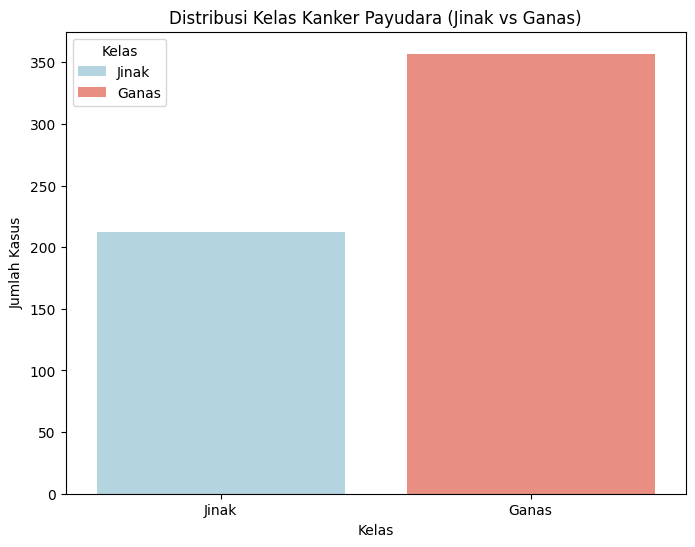

In [42]:
# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target', palette={0: 'lightblue', 1: 'salmon'}, hue='target')
plt.title('Distribusi Kelas Kanker Payudara (Jinak vs Ganas)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Kasus')
plt.xticks([0, 1], ['Jinak', 'Ganas'])
plt.legend(title='Kelas', labels=['Jinak', 'Ganas'], loc='upper left')

# Menampilkan grafik
plt.show()

## **4. Dimensionality Reduction dan Visualisasi PCA (Principal Component Analysis)**

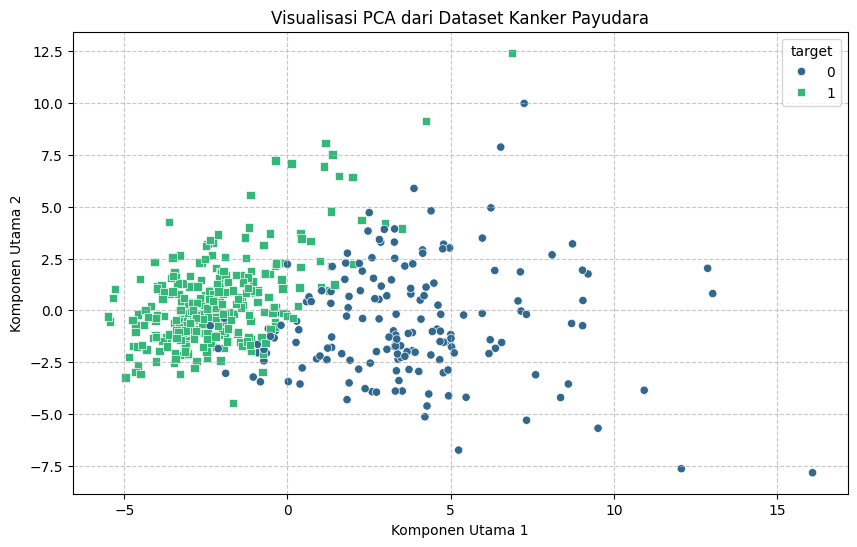

In [32]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train

# Visualisasi unik hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='target',
    palette='viridis',
    style='target',
    markers=['o', 's']
)

# Menambahkan judul grafik
plt.title('Visualisasi PCA dari Dataset Kanker Payudara')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()

## **5. Model Training with Random Forest**

In [33]:
# Train Model - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

## **6. Model Evaluation**

In [34]:
print("Laporan Klasifikasi :\n", classification_report(y_test, y_pred))
print("Matriks Kebingungannya :\n", confusion_matrix(y_test, y_pred))
print("\nSkor ROC-AUC :", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Matriks Kebingungannya :
 [[40  3]
 [ 1 70]]

Skor ROC-AUC : 0.995250573206682


## **7. Feature Importance Visualization**

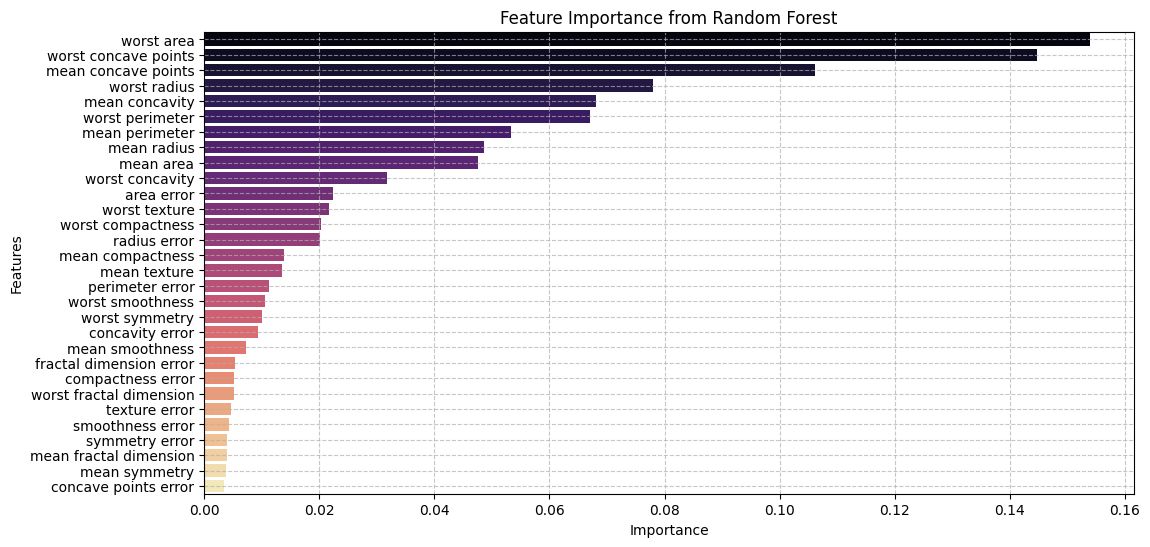

In [43]:
feature_importance = pd.DataFrame({
    'Feature': breast_cancer.feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Feature',
    palette='magma',
    hue='Feature'
)

# Menambahkan judul grafik
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()